1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

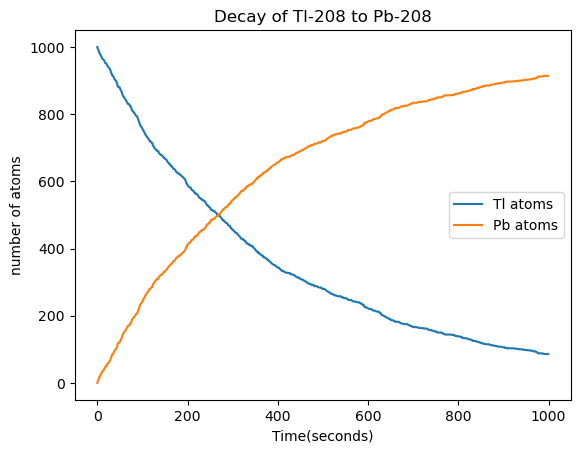

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
# constants
initial_Tl_atoms= 1000
initial_Pb_atoms= 0
half_life= 3.052 * 60  # in seconds

# time array
time_steps= np.arange(0,1000, 1) # 1000 seconds
# probability function
def decay_probability(t, tau):
    return 1 - 2**(-1 / tau)

# simulation
Tl_atoms= np.zeros(len(time_steps))
Pb_atoms= np.zeros(len(time_steps))

Tl_atoms[0]= initial_Tl_atoms

for i in range (1, len(time_steps)):
    t= time_steps[i]
    p_decay= decay_probability(t, half_life/ np.log(2))
    decay_Tl= np.random.binomial(Tl_atoms[i-1], p_decay)
    Tl_atoms[i]=Tl_atoms[i-1]- decay_Tl
    Pb_atoms[i]= Pb_atoms[i-1] + decay_Tl

# plotting
plt.plot(time_steps, Tl_atoms, label= 'Tl atoms')
plt.plot(time_steps, Pb_atoms, label= 'Pb atoms')
plt.xlabel('Time(seconds)')
plt.ylabel('number of atoms')
plt.legend()
plt.title('Decay of Tl-208 to Pb-208')
plt.show()

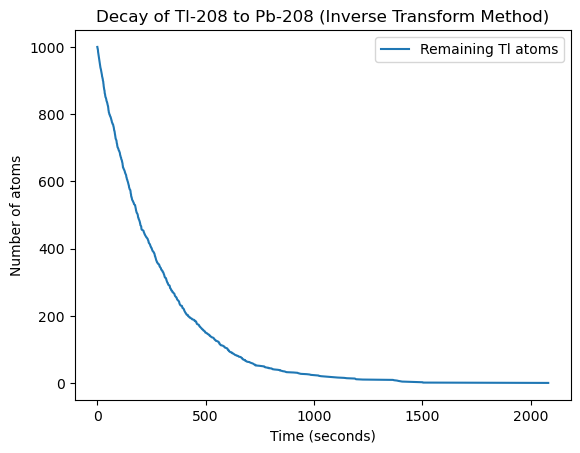

In [5]:
## second part
# Inverse transform method
def inverse_transform_method(size, tau):
    random_numbers = np.random.rand(size)
    decay_times = -tau * np.log(1 - random_numbers) / np.log(2)
    return decay_times

# Generate decay times
decay_times = inverse_transform_method(initial_Tl_atoms, half_life)

# Sort decay times
decay_times.sort()

# Simulation
remaining_Tl = initial_Tl_atoms - np.arange(len(decay_times))
remaining_Pb = np.arange(len(decay_times))

# Plotting
plt.plot(decay_times, remaining_Tl, label='Remaining Tl atoms')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of atoms')
plt.legend()
plt.title('Decay of Tl-208 to Pb-208 (Inverse Transform Method)')
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [14]:
## da correggere
import numpy as np
import matplotlib.pyplot as plt

# Constants
Z = 79
e = 1.602e-19  # Elementary charge in coulombs
epsilon_0 = 8.854e-12  # Vacuum permittivity in F/m
E = 7.7e6 * 1.602e-13  # Energy in Joules (converted from MeV to Joules)
a_0 = 1e-15  # Bohr radius in meters
sigma = a_0 / 100  # Standard deviation for the Gaussian distribution
num_particles = 1000000  # Number of alpha particles

# Simulating impact parameters with a 2D Gaussian distribution
np.random.seed(42)  # Set seed for reproducibility
impact_parameters = np.random.normal(loc=0, scale=sigma, size=(num_particles))

# Calculate scattering angles
theta_half=np.arctan((Z * e ** 2) / (2 * np.pi * epsilon_0 * E * impact_parameters))

# Calculate the fraction of particles that bounce back (scattering angle > pi/2)
fraction_bounce_back = np.sum(theta_half > np.pi/2) / num_particles

#np.sum(theta_half > np.pi/2) / num_particles

# Display the result
print(f"Fraction of particles that bounce back: {fraction_bounce_back:.4f}")


Fraction of particles that bounce back: 0.0000


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

Integral by Monte-Carlo method:  0.7288


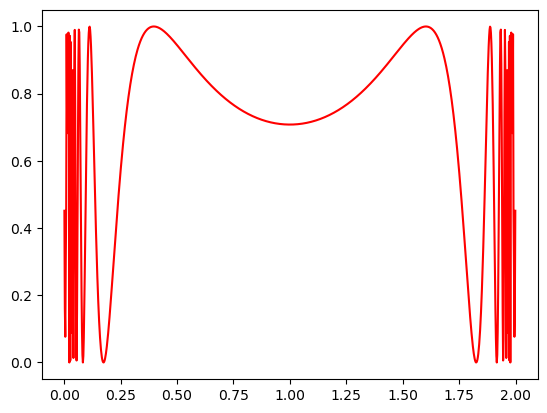

In [15]:
 #Hit or Miss method or Monte-Carlo method
def f(x):
    return (np.sin(1/(x*(2-x))))**2

x=np.linspace(0.001,1.999,1000) #at x=0 and x=2 very disturbing things happen. There exists singular points.
plt.plot(x,f(x),'r-')

N=100000
count=0
for i in range(N):
    x=np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=count/N
print("Integral by Monte-Carlo method: ",I)

In [16]:
# Mean value method
def f(x):
    return (np.sin(1/(x*(2-x))))**2

N=100000
x = np.random.uniform(size=N)
a = 0
b = 1
I = ((b-a)/N)*sum(f(x))
print("Integral by Mean value method",I)

Integral by Mean value method 0.7260939272864836


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [17]:
#Monte Carlo without for loop
import numpy as np

N = 1000000
r=1 #radius
x = np.random.uniform(-1.0,1.0,size=N)
y = np.random.uniform(-1.0,1.0,size=N)
distance = x**2+y**2
points_inside = len(distance[np.sqrt(distance)<=r])
#print(points_inside)
area = 4*(points_inside/N)
print("Area of the circle: ",area)

Area of the circle:  3.139088


In [18]:
# 10D Monte Carlo generalisation without for loop
# https://stackoverflow.com/questions/51091377/how-to-compute-volume-of-10-dimentional-sphere-with-monte-carlo-method-in-python
import numpy as np

def nSphereVolume(dim, N):
    point = np.random.uniform(-1.0, 1.0, size=[N,dim])
    distance = np.apply_along_axis(np.linalg.norm, 1, point)
    count_in_sphere = len(distance[distance<=1])
    #print(count_in_sphere)
    return np.power(2.0, dim) * (count_in_sphere / N)

print("Volume of a 10D sphere: ",nSphereVolume(10, 100000))
print("Area of a circle: ", nSphereVolume(2,100000))

Volume of a 10D sphere:  2.52928
Area of a circle:  3.135


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [19]:
import numpy as np
def f(x):
    return x**-0.5/(np.exp(x)+1)

def w(x):
    return np.sqrt(x)**-1

def inv_transform(x): #inverse transform method for sampling
    return np.square(x)/4

n = int(1e6)
x = np.random.uniform(0,2,size=n)
ws = inv_transform(x)
I = (np.sum(f(ws)/w(ws))*2)/n

print(np.round((I),2))

0.84
